In [1]:
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *

import seaborn as sns

sns.set()


### Load data

In [2]:
path = untar_data(URLs.PETS)


In [3]:
path.ls()


(#2) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images')]

In [4]:
(path/"images").ls()[:4]


(#4) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat')]

In [5]:
(path.ls())


(#2) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images')]

In [6]:
(path/"images").ls()[:4]


(#4) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat')]

### Parse breeds names

In [7]:
fname = (path/"images").ls()[0]
fname


Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [8]:
re.findall(r'(.+)_\d+.jpg$', fname.name)


['Abyssinian']

### Create dataset

In [9]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=100, min_scale=0.75))
dls = pets.dataloaders(path/"images")


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


### Show some images

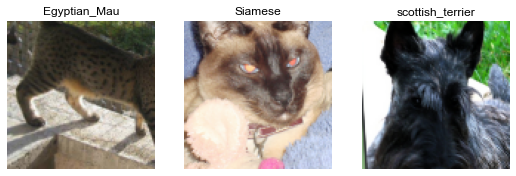

In [10]:
dls.show_batch(nrows=1, ncols=3)


### Summurazing data information

In [11]:
pets1 = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(seed=42),
                  get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")


Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\Vadim\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\Vadim\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 375, 500])
	Item at index 1 has shape: torch.Size([3, 199, 300])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size